<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'> 
</center>

----------
<center align="left"> <font size='10'>  Webscraping Project</font></center>

<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Vivian Kuang</font></center>
<br>

----------

## IMPORTS

In [29]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re
from time import sleep
import numpy as np
import random
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
#import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline

## SET UP THE DRIVER

In [30]:
#always keep this separate so as not to open too many browsers

#path = 'C:\\Users\\vivian\\Desktop\\WeCloudData\\Python\\chromedriver_win32\\chromedriver.exe'
#driver = webdriver.Chrome(path)

#driver = webdriver.Chrome('C:\\Users\\vivian\\Desktop\\WeCloudData\\Python\\chromedriver_win32\\chromedriver.exe')

s = Service('C:\\Users\\vivian\\Desktop\\WeCloudData\\Python\\chromedriver_win32\\chromedriver.exe')
driver = webdriver.Chrome(service=s)


## GET THE STARTING PAGE

In [1]:
#page_url = 'https://www.zolo.ca/toronto-real-estate/houses'
#page_url = 'https://www.zolo.ca/toronto-real-estate/houses/page-1'
#driver.get(page_url)

#Function to get pages for different cities
#def get_page_url(city, pg_num):
#    url = f'https://www.yellowpages.ca/search/si/1/{job_title}/{city}+{province}'
#    url = f'https://www.zolo.ca/{city}-real-estate/page-{pg_num}'
#    return url

#get Toronto's real estate lisitngs 
#page_url = get_page_url('toronto', 1)

#Test to see it can get the url or not
#page_url = 'https://www.zolo.ca/toronto-real-estate/houses/page-1'
#result=driver.get(page_url)
#driver.page_source
#soup = BeautifulSoup(driver.page_source)
#soup.find('a', class_ = 'xs-block xs-aspect-3-2 fill-grey-bg-3 card-listing--image-link').get('href')

In [ ]:
## GET ALL THE URLS of LISTINGS

In [31]:
#get house and townhouse listings' url
#Login with the session id to searh througth all toronto house and townhouse 
page_url = 'https://www.zolo.ca/index.php?ssid=1820721&s_r=1&attributes=&has_photos=0&ptype_townhouse=1&ptype_condo=0&ptype_house=1&stype=&min_price=0&max_price=0&min_beds=0&min_baths=0&min_sqft=0&openhouse_search=0&filter=1&sarea=Toronto&search_order=3'
#Login with the session id to searh througth all toronto condos 
#page_url = 'https://www.zolo.ca/index.php?ssid=1820723&s_r=1&attributes=&has_photos=0&ptype_townhouse=0&ptype_condo=1&ptype_house=0&stype=&min_price=0&max_price=0&min_beds=0&min_baths=0&min_sqft=0&openhouse_search=0&filter=1&sarea=Toronto&search_order=3'


result=driver.get(page_url)


#save all listings of house and townhouses in Toronto at RealEastate_urls
RealEstate_urls = []
for i in range(60): # number in range changes as searching critiria changes (city, type) 
    page_url = 'https://www.zolo.ca/toronto-real-estate/page-'+str(i+1)
#    url = f'https://www.zolo.ca/{city}-real-estate/page-{pg_num}'
#    city is the variable to change and get the data for each city (ex. toronto, vancouver, montreal)
#    suggest manually change for each city and save on separated files when computer has limited memory
    #print(page_url)
    driver.get(page_url)
    soup = BeautifulSoup(driver.page_source)
    for tag in soup.find_all('a', class_='xs-block xs-aspect-3-2 fill-grey-bg-3 card-listing--image-link'):
        RealEstate_urls.append(tag.get('href'))

In [41]:
#show all urls
#RealEstate_urls

['https://www.zolo.ca/toronto-real-estate/1536-king-street-west',
 'https://www.zolo.ca/toronto-real-estate/7-robbinstone-drive',
 'https://www.zolo.ca/toronto-real-estate/11-sigmont-road',
 'https://www.zolo.ca/toronto-real-estate/25-prennan-avenue',
 'https://www.zolo.ca/toronto-real-estate/72-gwendolen-crescent',
 'https://www.zolo.ca/toronto-real-estate/21-freemon-redmon-circle',
 'https://www.zolo.ca/toronto-real-estate/18-aldwych-avenue',
 'https://www.zolo.ca/toronto-real-estate/6-oak-park-avenue',
 'https://www.zolo.ca/toronto-real-estate/82-eaton-avenue',
 'https://www.zolo.ca/toronto-real-estate/105-crendon-drive',
 'https://www.zolo.ca/toronto-real-estate/60-emily-avenue',
 'https://www.zolo.ca/toronto-real-estate/113-brownville-avenue',
 'https://www.zolo.ca/toronto-real-estate/6-lea-grove-crescent',
 'https://www.zolo.ca/toronto-real-estate/289-maria-street',
 'https://www.zolo.ca/toronto-real-estate/79-nairn-avenue',
 'https://www.zolo.ca/toronto-real-estate/217-euclid-av

In [42]:
#write all urls into a cvs
import csv

def write_urls_to_csv(url_list, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        #writer.writerow(['URLs of Toronto House and Townhouse listings '])  # Write the header row
        for url in url_list:
            writer.writerow([url])

write_urls_to_csv(RealEstate_urls, 'realestate_urls.csv')


In [ ]:
## GET DETAILED INFO OF ALL THE LISTINGS and WRITE THE LISTINGS INFO TO LISTING_INFO.CSV

In [58]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException


# Create an empty list to store the extracted listing information
listing_info = []

# List of city names
city = 'toronto'  # change to cities as needed
       
# selected_urls = urls
# Iterate over the URLs
for url in RealEstate_urls: #adjust column based on memory： RealEstate_urls[:1000]: 
# Open the URL in Selenium-controlled browser
# url ='https://www.zolo.ca/toronto-real-estate/72-walmer-road'
    driver.get(url)

    # Find and extract the desired information using Selenium's find_element methods
    try:
        address_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > h1')
        address = address_element.text.strip()
    except NoSuchElementException:
        address = ''

    try:
        country_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > div > a:nth-child(1)')
        city = country_element.text.strip()
    except NoSuchElementException:
        city = ''

    try:
        suburb_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > div > a:nth-child(2)')
        suburb = suburb_element.text.strip()
    except NoSuchElementException:
        suburb = ''

    try:
        beds_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > ul > li:nth-child(1) > span')
        beds = beds_element.text.strip()
    except NoSuchElementException:
        beds = ''

    try:
        baths_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > ul > li:nth-child(2) > span')
        baths = baths_element.text.strip()
    except NoSuchElementException:
        baths = ''

    try:
        price_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-price.sm-text-right.sm-flex.sm-flex-column > div.xs-text-2.sm-text-1.heavy.xs-inline.sm-block.xs-mr2.sm-mr0')
        price = price_element.text.strip()
    except NoSuchElementException:
        price = ''

    try:
        size_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-location.min-width-0 > ul > li:nth-child(3) > span')
        size = size_element.text.strip()
    except NoSuchElementException:
        size = ''

    try:
        offering_type_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.xs-grid.xs-gap-2.listing-summary-grid.xs-mt4.xs-mb3.md-mt5 > section.listing-price.sm-text-right.sm-flex.sm-flex-column > div.xs-mt2.xs-flex.xs-flex-align-center.sm-flex-row-reverse > div.bold')
        offering_type = offering_type_element.text.strip()
    except NoSuchElementException:
        offering_type = ''

    try:
        type_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(1) > dd > span')
        listing_type = type_element.text.strip()
    except NoSuchElementException:
        listing_type = ''

    try:
        style_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(2) > dd > span')
        style = style_element.text.strip()
    except NoSuchElementException:
        style = ''

    try:
        year_built_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(7) > dd > span')
        year_built = year_built_element.text.strip()
    except NoSuchElementException:
        year_built = ''

    try:
        taxes_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(6) > dd > span')
        taxes = taxes_element.text.strip()
    except NoSuchElementException:
        taxes = ''

    try:
        lot_size_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(4) > dd > span')
        lot_size = lot_size_element.text.strip()
    except NoSuchElementException:
        lot_size = ''

    try:
        walk_score_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div:nth-child(1) > dl:nth-child(8) > dd')
        walk_score = walk_score_element.text.strip()
    except NoSuchElementException:
        walk_score = ''

    # Find and extract the MLS ID
    try:
        mls_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div.xs-mt3.sm-mt0 > dl.column.key-fact-mls > dd > span')
        mls_id = mls_element.text.strip()
    except NoSuchElementException:
        mls_id = ''
        
    # Find and extract the source information
    try:
        source_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div.xs-mt3.sm-mt0 > dl:nth-child(5) > dd')
        source = source_element.text.strip()
    except NoSuchElementException:
        source = ''
        
    # Find and extract the listed by information
    try:
        listed_by_element = driver.find_element(By.CSS_SELECTOR, '#listing > div > div > section.section-listing.section-listing-pad.xs-border-top-none.md-border-top-lighter.xs-mt3.xs-pb4.md-pt3.md-pb5.expandable > section.section-listing-content.sm-grid.sm-gap-3.xs-mb3.sm-grid-cols-2 > div.xs-mt3.sm-mt0 > dl:nth-child(6) > dd')
        listed_by = listed_by_element.text.strip()
    except NoSuchElementException:
        listed_by = ''


    # Store the extracted information in a dictionary
    listing_data = {
        'URL': url,
        'Address': address,
        'City' : city,
        'Suburb': suburb,
        'Beds' : beds,
        'Baths': baths,
        'Size':size,
        'Offering Type': offering_type,
        'Price': price,
        'Type': listing_type,
        'Style' : style,
        'Lot Size': lot_size,    
        'Year Built' : year_built,
        'Walk Score': walk_score,
        'MLS ID': mls_id,
        'Source': source,
        'Listed By': listed_by
    }
        
    # Append the listing data to the list
    listing_info.append(listing_data)

#print(pd.DataFrame(listing_info))
# Define the output CSV file path
output_file = 'listing_info-'+city+'.csv'


#try save every 20 records a time

# For RealEstate_urls
#     if line_num % 20 == 0:
#         # save data to dataframe
#         df = pd.DataFrame(info)
#         df.to_csv('zolo_realEstate.csv',index=False,mode='a',header=False)


# Write the extracted information to the CSV file
with open(output_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=listing_info[0].keys())
    writer.writeheader()
    writer.writerows(listing_info)
    
# # Print or store the extracted information
#     print('Address:', address)
#     print('City:', city)
#     print('Suburb:', suburb)
#     print('Beds:', beds)
#     print('Baths:', baths)
#     print('Size:', size)
#     print('Offering Type:', offering_type)
#     print('Price:', price)
#     print('Type:', listing_type)
#     print('Style:', style)
#     print('Year Built:', year_built)
#     print('Taxes:', taxes)
#     print('Strata Fees:', strata_fees)
#     print('Walk Score:', walk_score)
#     print('MLS ID:', mls_id)
#     print('Listed By:', listed_by)
#     print('\n')    


In [55]:
#show dataframe 
print(pd.DataFrame(listing_info))

                                                   URL                Address  \
0    https://www.zolo.ca/toronto-real-estate/1536-k...     1536 King Street W   
1    https://www.zolo.ca/toronto-real-estate/7-robb...    7 Robbinstone Drive   
2    https://www.zolo.ca/toronto-real-estate/11-sig...        11 Sigmont Road   
3    https://www.zolo.ca/toronto-real-estate/25-pre...      25 Prennan Avenue   
4    https://www.zolo.ca/toronto-real-estate/72-gwe...  72 Gwendolen Crescent   
..                                                 ...                    ...   
995  https://www.zolo.ca/toronto-real-estate/174-av...    174 Avondale Avenue   
996  https://www.zolo.ca/toronto-real-estate/15-ald...  15 Aldershot Crescent   
997  https://www.zolo.ca/toronto-real-estate/95-ris...   95 Risebrough Avenue   
998  https://www.zolo.ca/toronto-real-estate/6-leav...     6 Leaves Terrace N   
999  https://www.zolo.ca/toronto-real-estate/31-cra...      31 Craiglee Drive   

        City               

In [ ]:
# Close the browser
driver.quit()

In [ ]:
## STUDY THE LISTING_INFO CSV FILE

In [3]:
import pandas as pd

# Read the data from a CSV file
df = pd.read_csv('listing_info-toronto.csv')


# Combine data when zoom out to study the 4 city data
# df_vancouver = pd.read_csv('listing_info-vancouver.csv')
# df_burnaby = pd.read_csv('listing_info-burnaby.csv')
# df_surrey = pd.read_csv('listing_info-surrey.csv')
# df_toronto = pd.read_csv('listing_info-toronto.csv')
# df = pd.concat([df_vancouver, df_surrey, df_burnaby, df_toronto], ignore_index=True)
# df = combined_df.drop('Year Built', axis=1)


# Display the first few rows of the DataFrame
print(df.head(10))

# Get general information about the dataset
print(df.info())

# Check descriptive statistics of numeric columns
print(df.describe())

# Check the column names
print(df.columns)

# Check the number of rows and columns
print(df.shape)

# Check for missing values
print(df.isnull().sum())


                                                 URL  \
0  https://www.zolo.ca/toronto-real-estate/1536-k...   
1  https://www.zolo.ca/toronto-real-estate/7-robb...   
2  https://www.zolo.ca/toronto-real-estate/11-sig...   
3  https://www.zolo.ca/toronto-real-estate/25-pre...   
4  https://www.zolo.ca/toronto-real-estate/72-gwe...   
5  https://www.zolo.ca/toronto-real-estate/21-fre...   
6  https://www.zolo.ca/toronto-real-estate/18-ald...   
7  https://www.zolo.ca/toronto-real-estate/6-oak-...   
8  https://www.zolo.ca/toronto-real-estate/82-eat...   
9  https://www.zolo.ca/toronto-real-estate/105-cr...   

                    Address     City                          Suburb Beds  \
0        1536 King Street W  Toronto                  South Parkdale  5+1   
1       7 Robbinstone Drive  Toronto                         Malvern  3+2   
2           11 Sigmont Road  Toronto  Eringate-centennial-west Deane  3+1   
3         25 Prennan Avenue  Toronto      Islington-city Centre West  4+1  

In [145]:
df

,URL,Address,City,Suburb,Beds,Baths,Size,Offering Type,Price,Type,Style,Lot Size,Year Built,Walk Score,MLS ID,Source,Listed By
0,https://www.zolo.ca/toronto-real-estate/1536-k...,1536 King Street W,Toronto,South Parkdale,5+1,5.0,NaN,For Sale,"$1,698,000",SEMI-DETACHED,2 1/2 Storey,27.33 x 150.5 Feet,NaN,NaN,W6181056,TRREB,CORE ASSETS REAL ESTATE
1,https://www.zolo.ca/toronto-real-estate/7-robb...,7 Robbinstone Drive,Toronto,Malvern,3+2,4.0,NaN,For Sale,"$999,900",SEMI-DETACHED,Bungalow-Raised,29.83 x 110.92 Feet,NaN,NaN,E6180984,TRREB,RE/MAX HALLMARK YORK GROUP REALTY LTD.
2,https://www.zolo.ca/toronto-real-estate/11-sig...,11 Sigmont Road,Toronto,Eringate-centennial-west Deane,3+1,2.0,NaN,For Sale,"$1,085,000",Detached,Bungalow,45.06 x 122.66 Feet,NaN,NaN,W6181112,TRREB,RE/MAX WEST REALTY INC.
3,https://www.zolo.ca/toronto-real-estate/25-pre...,25 Prennan Avenue,Toronto,Islington-city Centre West,4+1,5.0,3500-5000,For Sale,"$3,089,000",Detached,2-Storey,44.31 x 160.23 Feet,NaN,NaN,W6180904,TRREB,ROYAL LEPAGE REAL ESTATE SERVICES LTD.
4,https://www.zolo.ca/toronto-real-estate/72-gwe...,72 Gwendolen Crescent,Toronto,Lansing-westgate,1+1,2.0,NaN,For Sale,"$2,199,000",Detached,Bungalow,40.00 x 255 Feet,NaN,NaN,C6180632,TRREB,HARVEY KALLES REAL ESTATE LTD.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,https://www.zolo.ca/toronto-real-estate/88-for...,88 Forest Heights Boulevard,Toronto,St. Andrew-windfields,NaN,NaN,NaN,For Sale,"$XX,XXX,XXX",Detached,2-Storey,100.00 x 289 Feet,NaN,NaN,NaN,NaN,NaN
2118,https://www.zolo.ca/toronto-real-estate/11-wal...,11 Walnut Crescent,Toronto,Long Branch,4,5.0,3000-3500,For Sale,"$3,800,000",Detached,2-Storey,50.00 x 125 Feet,NaN,NaN,W5719349,TRREB,"HOMELIFE/BAYVIEW REALTY INC., BROKERAGE"
2119,https://www.zolo.ca/toronto-real-estate/4-glen...,4 Glenholme Avenue,Toronto,Corso Italia-davenport,6,6.0,NaN,For Sale,"$1,950,000",Multiplex,2 1/2 Storey,35.00 x 110 Feet,NaN,NaN,W5711107,TRREB,"SOLTANIAN REAL ESTATE INC., BROKERAGE"
2120,https://www.zolo.ca/toronto-real-estate/15-roy...,15 Royal Oak Drive,Toronto,Bridle Path-sunnybrook-york Mills,NaN,NaN,NaN,For Sale,"$X,XXX,XXX",Detached,2-Storey,104.00 x 120 Feet,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Year Built'].isna().sum()

2067

In [5]:
import pandas as pd

# Assuming 'Price' column in the DataFrame contains string values representing house prices
df['Price'] = df['Price'].str.replace(',', '')  # Remove commas from the price strings
df['Price'] = df['Price'].str.replace('\$', '')# Remove $ from the price strings
df['Price'] = df['Price'].str.extract('(\d+)')  # Extract the numeric part of the price strings
df['Price'] = df['Price'].astype(float)  # Convert the price strings to float

# Now the 'Price' column contains digital values
print(df['Price'])

# Assuming 'Lot Size' column in the DataFrame contains string values representing Lot
df['Lot Size'] = df['Lot Size'].str.replace('Feet', '')  # Remove Feet from the Walk Score strings
def calculate_size(row):
    values = str(row).split(' x ')
    if len(values) == 2:
        try:
            length = float(values[0])
            width = float(values[1].split(' ')[0])
            return length * width
        except ValueError:
            return None
    return None
df['final size'] = df['Lot Size'].apply(calculate_size)



0       1698000.0
1        999900.0
2       1085000.0
3       3089000.0
4       2199000.0
          ...    
2117          NaN
2118    3800000.0
2119    1950000.0
2120          NaN
2121    6000000.0
Name: Price, Length: 2122, dtype: float64


C:\Users\vivian\AppData\Local\Temp\ipykernel_26784\2338814489.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace('\$', '')# Remove $ from the price strings


In [6]:
#Check the convertion 
df.info()

#describe the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URL            2122 non-null   object 
 1   Address        2121 non-null   object 
 2   City           2121 non-null   object 
 3   Suburb         2110 non-null   object 
 4   Beds           1879 non-null   object 
 5   Baths          1880 non-null   float64
 6   Size           663 non-null    object 
 7   Offering Type  2120 non-null   object 
 8   Price          1930 non-null   float64
 9   Type           2121 non-null   object 
 10  Style          2121 non-null   object 
 11  Lot Size       2121 non-null   object 
 12  Year Built     55 non-null     object 
 13  Walk Score     55 non-null     object 
 14  MLS ID         1930 non-null   object 
 15  Source         1930 non-null   object 
 16  Listed By      1920 non-null   object 
 17  final size     2044 non-null   float64
dtypes: float

,Baths,Price,final size
count,1880.000000,1.930000e+03,2044.000000
mean,3.604787,2.371595e+06,5968.915403
std,1.723172,2.150753e+06,7990.188459
min,1.000000,1.000000e+00,0.000000
25%,2.000000,1.249000e+06,2748.130200
50%,3.000000,1.749900e+06,4596.500000
75%,5.000000,2.695000e+06,6608.727950
max,19.000000,2.800000e+07,156711.766200


In [7]:
df['final size']

0        4113.1650
1        3308.7436
2        5527.0596
3        7099.7913
4       10200.0000
           ...    
2117    28900.0000
2118     6250.0000
2119     3850.0000
2120    12480.0000
2121    16493.0000
Name: final size, Length: 2122, dtype: float64

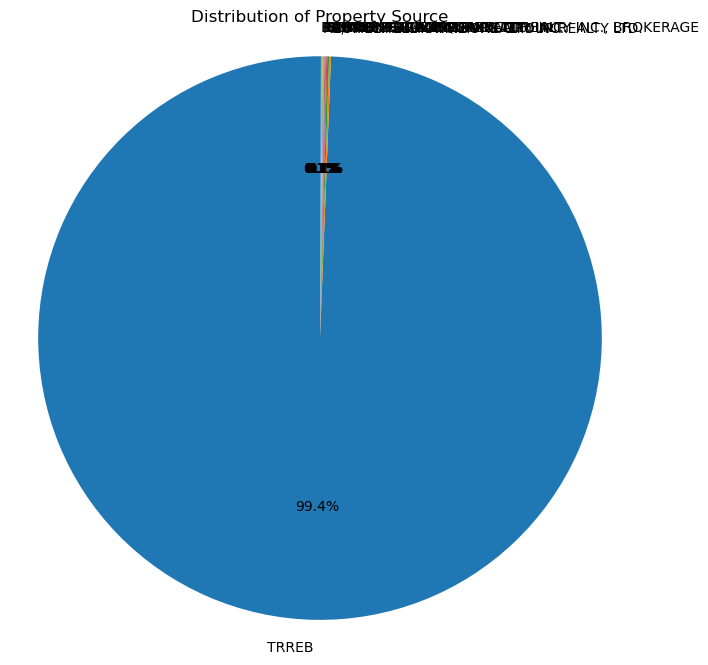

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 6))
# plt.scatter(df['Source'].astype(str), df['Price'])
# plt.xlabel('Source')
# plt.ylabel('Price')
# plt.title('Price vs Listed By')
# plt.xticks(rotation=90)
# plt.show()

# Count the occurrences of each property type
property_counts = df['Source'].value_counts()


# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Property Source')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

RIGHT AT HOME REALTY                         2.497644
ROYAL LEPAGE SIGNATURE REALTY                2.262017
HARVEY KALLES REAL ESTATE LTD.               2.120641
FOREST HILL REAL ESTATE INC.                 2.026390
RE/MAX HALLMARK REALTY LTD.                  1.979265
                                               ...   
LANDSTARS 360 REALTY INC., BROKERAGE         0.047125
HAZELTON REAL ESTATE INC., BROKERAGE         0.047125
RE/MAX ELITE REAL ESTATE                     0.047125
WIDE WORLD PROPERTIES LIMITED                0.047125
RE/MAX REALTY ENTERPRISES INC., BROKERAGE    0.047125
Name: Listed By, Length: 516, dtype: float64


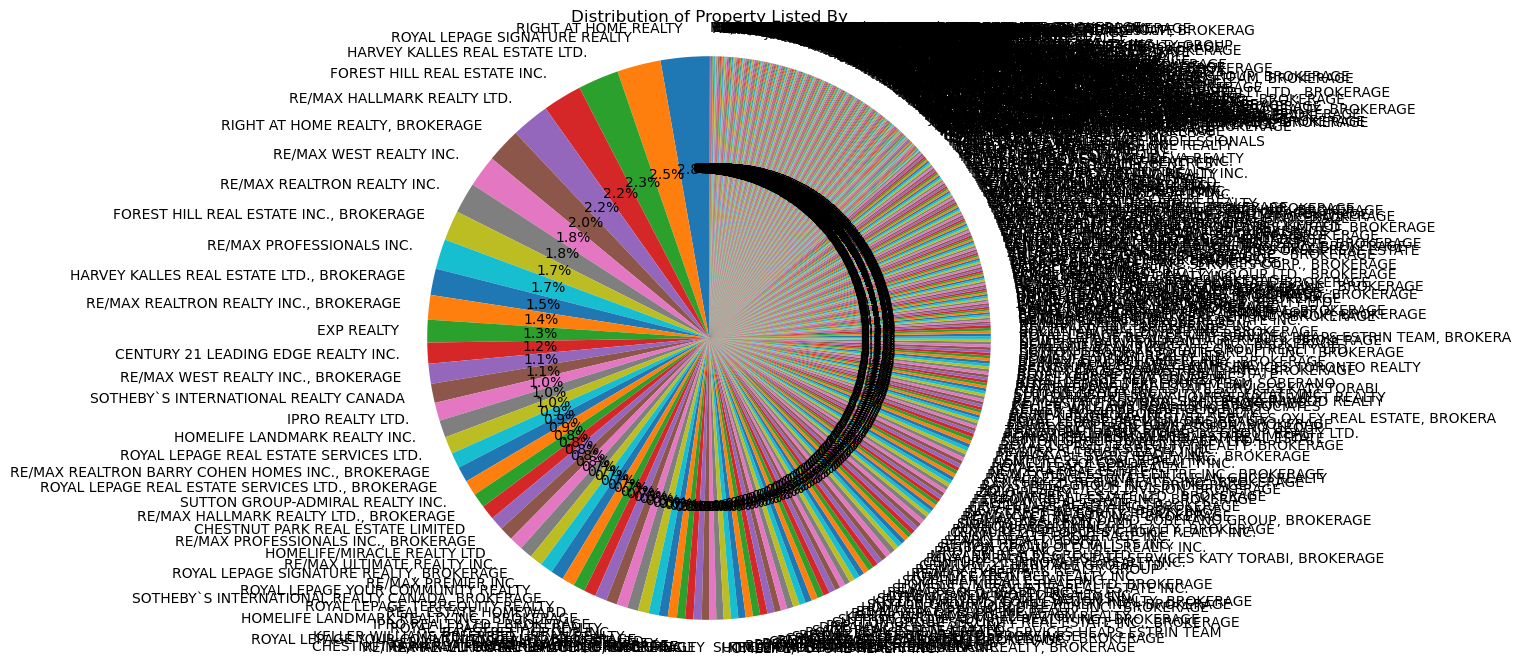

In [21]:
# Calculate the frequency of each 'Listed By' category
listing_counts = df['Listed By'].value_counts()

# Calculate the percentage of listings by 'Listed By'
listing_percentage = listing_counts / len(df) * 100

print(listing_percentage)


# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Property Listed By')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

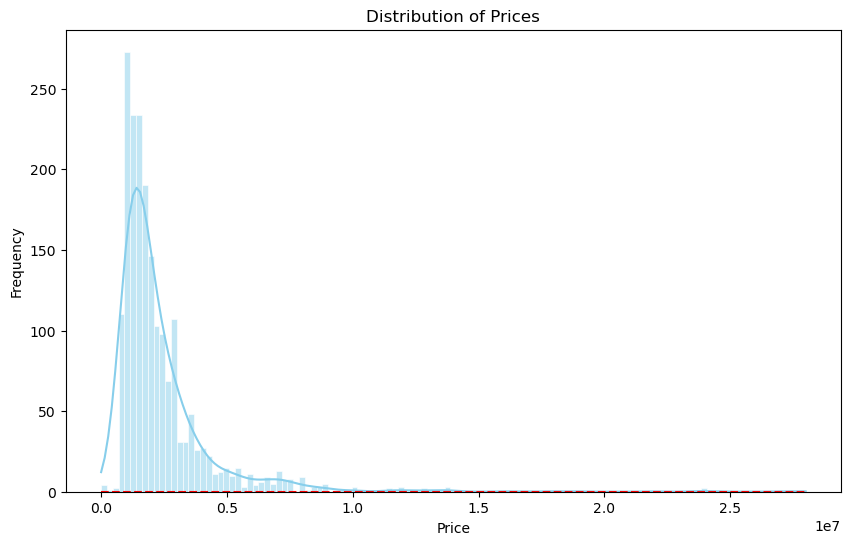

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and standard deviation of prices
mean_price = df['Price'].mean()
std_price = df['Price'].std()

# Create histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue', edgecolor='white')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

# Overlay normal distribution curve
x = np.linspace(df['Price'].min(), df['Price'].max(), 100)
y = (1 / (std_price * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_price) / std_price) ** 2)
plt.plot(x, y, color='red', linestyle='--', label='Normal Distribution')

#plt.legend()
plt.show()

Suburb
Bridle Path-sunnybrook-york Mills    8.558941e+06
Forest Hill South                    5.949650e+06
Edenbridge-humber Valley             4.928722e+06
St. Andrew-windfields                4.838753e+06
Rosedale-moore Park                  4.820205e+06
                                         ...     
Mount Dennis                         1.017180e+06
Glenfield-jane Heights               1.016889e+06
Rexdale-kipling                      9.958371e+05
Malvern                              9.476421e+05
North St. James Town                 7.990000e+05
Name: Price, Length: 140, dtype: float64


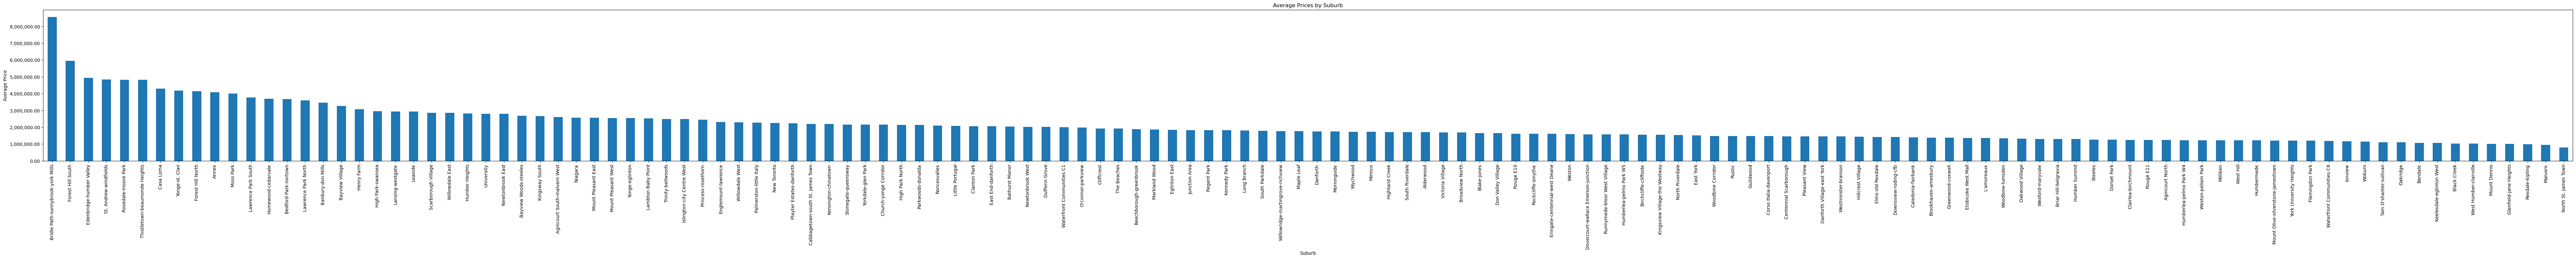

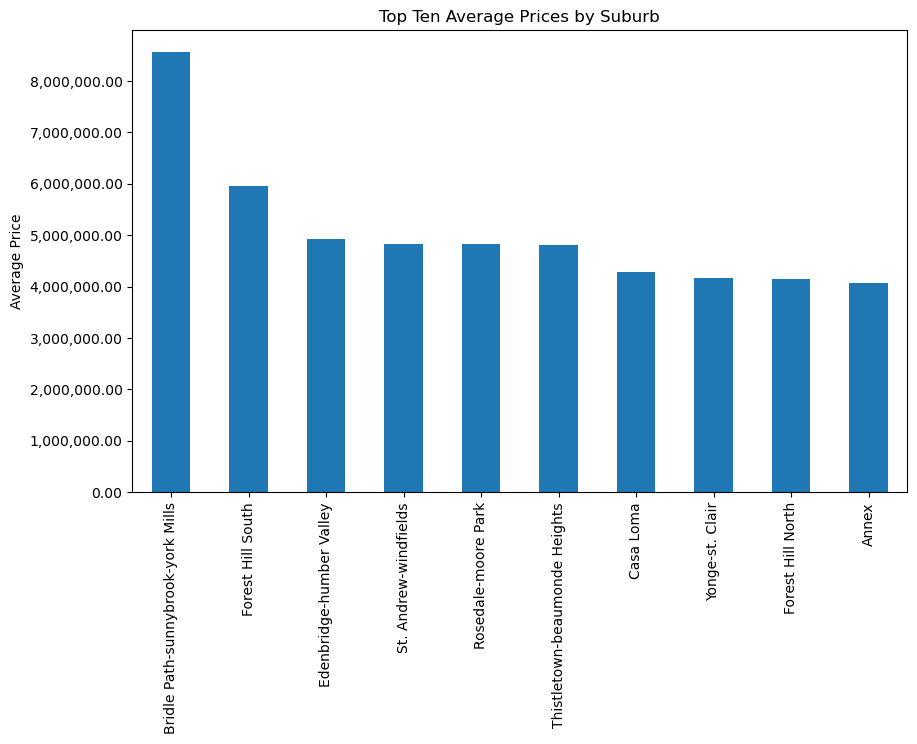

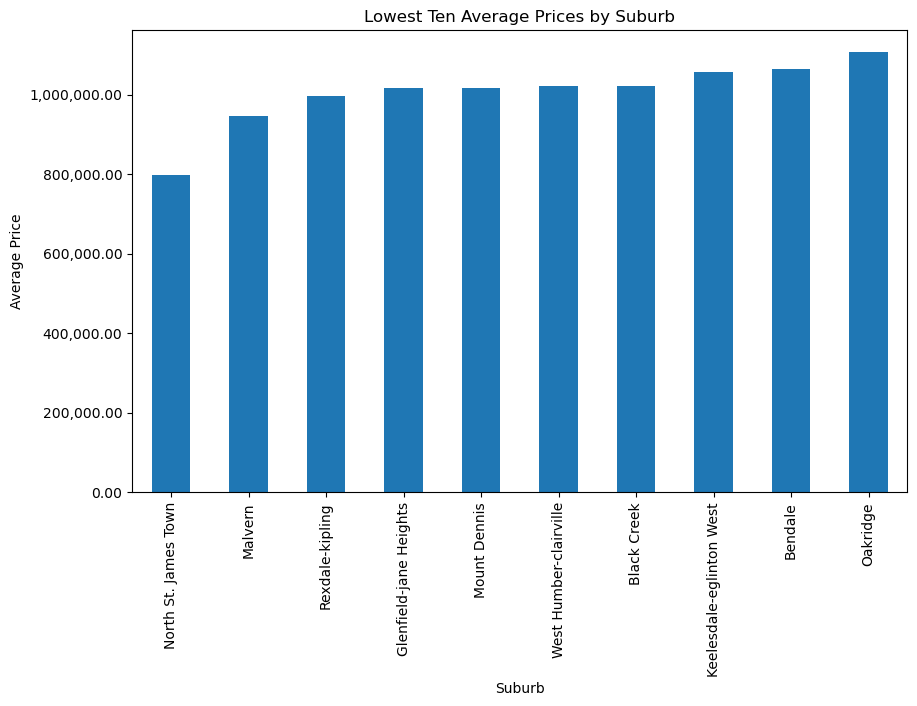

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average prices by suburb
avg_price_by_suburb = df.groupby('Suburb')['Price'].mean().nlargest(140)
print(avg_price_by_suburb)

# Bar chart for average prices by suburb
plt.figure(figsize=(100, 6))
avg_price_by_suburb.plot(kind='bar').get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.title('Average Prices by Suburb')
#plt.xticks(rotation=45)
plt.show()

# Average prices by suburb
avg_price_by_suburb = df.groupby('Suburb')['Price'].mean().nlargest(10)

# Bar chart for top ten average prices by suburb
plt.figure(figsize=(10, 6))
avg_price_by_suburb.plot(kind='bar').get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))
plt.xlabel('')
plt.ylabel('Average Price')
plt.title('Top Ten Average Prices by Suburb')
#plt.xticks(rotation=45)
plt.show()

# Average prices by suburb
avg_price_by_suburb = df.groupby('Suburb')['Price'].mean().nsmallest(10)

# Bar chart for lowest ten average prices by suburb
plt.figure(figsize=(10, 6))
avg_price_by_suburb.plot(kind='bar').get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.title('Lowest Ten Average Prices by Suburb')
# plt.xticks(rotation=45)
plt.show()



In [167]:
# Select the 50 highest-priced properties
top_50_highest_priced = df.nlargest(5SS0, 'Price')

# Display the selected columns
selected_columns = ['Suburb', 'Type', 'Year Built', 'Beds', 'Baths']
result_df = top_50_highest_priced[selected_columns]

print(result_df)



                                 Suburb              Type  Year Built Beds  \
1276  Bridle Path-sunnybrook-york Mills          Detached         NaN    8   
2091                          Moss Park        Investment  $4,600 /yr  NaN   
1926  Bridle Path-sunnybrook-york Mills          Detached         NaN  8+5   
2104  Bridle Path-sunnybrook-york Mills          Detached         NaN  6+2   
1639  Bridle Path-sunnybrook-york Mills          Detached         NaN    6   
863                 Lawrence Park North          Detached         NaN  5+1   
1111                  Forest Hill South          Detached         NaN  5+1   
1712      Thistletown-beaumonde Heights  Sale Of Business  $4,568 /yr  NaN   
1184  Bridle Path-sunnybrook-york Mills          Detached         NaN  5+1   
1332  Bridle Path-sunnybrook-york Mills          Detached         NaN  5+1   
1868                  Banbury-don Mills          Detached         NaN  5+1   
1919  Bridle Path-sunnybrook-york Mills          Detached       

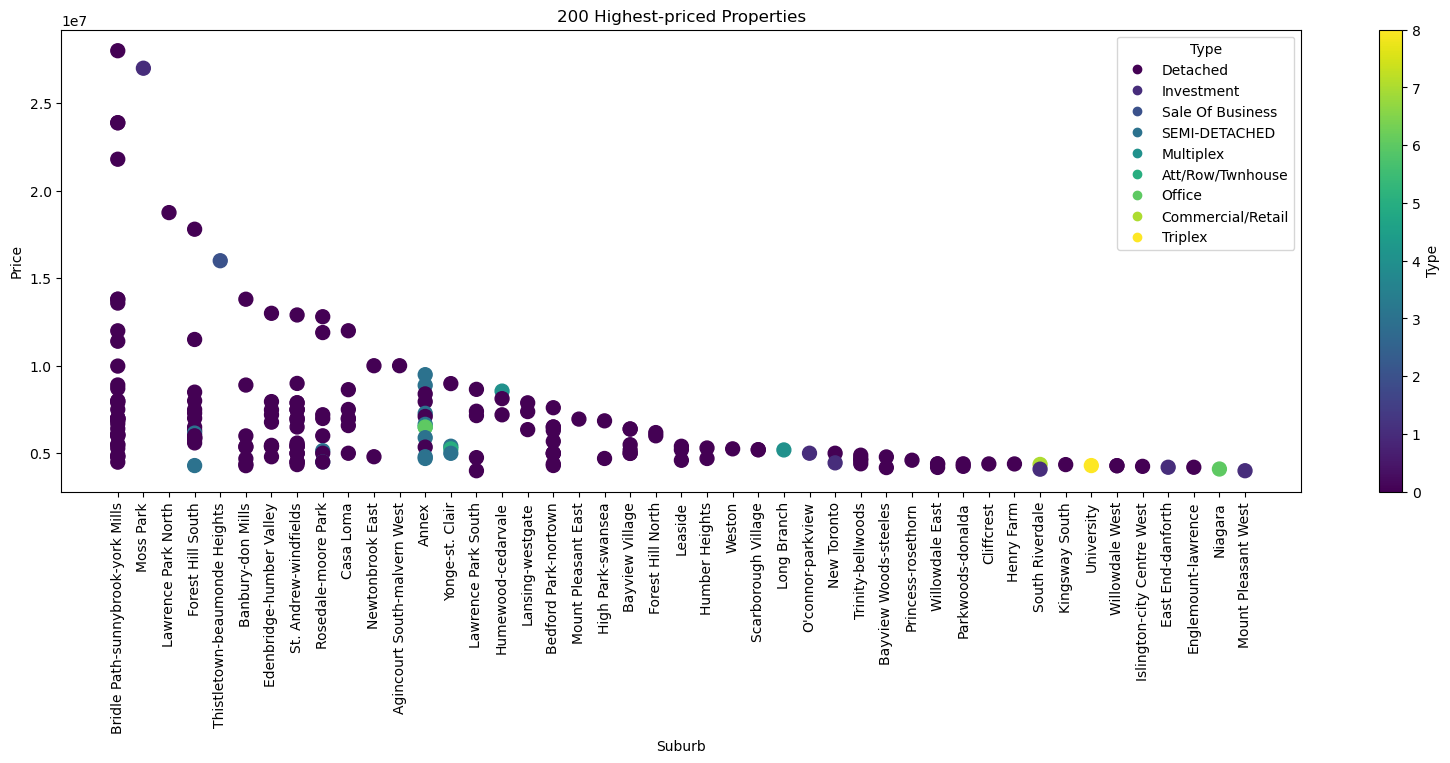

In [25]:
import matplotlib.pyplot as plt
# Select the 50 highest-priced properties
top_50_highest_priced = df.nlargest(200, 'Price')
# Convert 'Type' column into numerical codes
type_codes = pd.factorize(top_50_highest_priced['Type'])[0]
# Set up scatter plot
plt.figure(figsize=(20, 6))
scatter = plt.scatter(top_50_highest_priced['Suburb'].astype(str), top_50_highest_priced['Price'], c=type_codes, cmap='viridis', s=100, label='Type')
# Add colorbar
plt.colorbar(label='Type')
# Add legend
legend_elements = scatter.legend_elements()[0]
labels = pd.factorize(top_50_highest_priced['Type'])[1]
plt.legend(legend_elements, labels, title='Type')
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.title('200 Highest-priced Properties')
plt.xticks(rotation=90)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

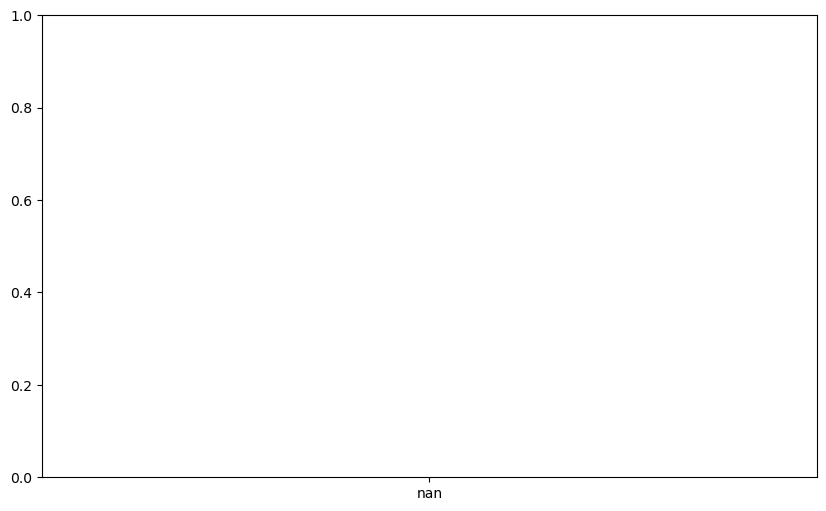

In [27]:
# Convert 'Price' column to numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Select the 50 highest-priced properties
top_50_highest_priced = df.nlargest(50, 'Price')

# Set up scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_50_highest_priced['Year Built'].astype(str), top_50_highest_priced['Beds'], c=top_50_highest_priced['Price'], cmap='viridis', s=100)
plt.colorbar(label='Price')
plt.xlabel('Year Built')
plt.ylabel('Beds')
plt.title('50 Highest-priced Properties')

# Display the plot
plt.show()



                     count          mean           std         min         max
Detached              1402  2.550968e+06  2.270378e+06    599998.0  28000000.0
SEMI-DETACHED          278  1.691547e+06  1.174555e+06    775000.0   9489000.0
Att/Row/Twnhouse       112  1.511688e+06  8.285400e+05    699900.0   6500000.0
Investment              30  3.746470e+06  4.484699e+06   1595000.0  27000000.0
Duplex                  34  2.010546e+06  5.856261e+05    998000.0   3785000.0
Triplex                 23  2.208252e+06  8.095309e+05   1350000.0   4295000.0
Multiplex               18  2.819316e+06  1.831704e+06         1.0   8550000.0
Commercial/Retail        4  2.049200e+06  1.562509e+06    950000.0   4359000.0
Row / Townhouse          5  1.716000e+06  1.251428e+06    799000.0   3895000.0
House/Single Family      5  1.919378e+06  1.106585e+06   1289000.0   3888888.0
Store W/Apt/Office       5  1.681400e+06  3.559049e+05   1070000.0   1949000.0
Office                   4  3.982750e+06  2.099292e+

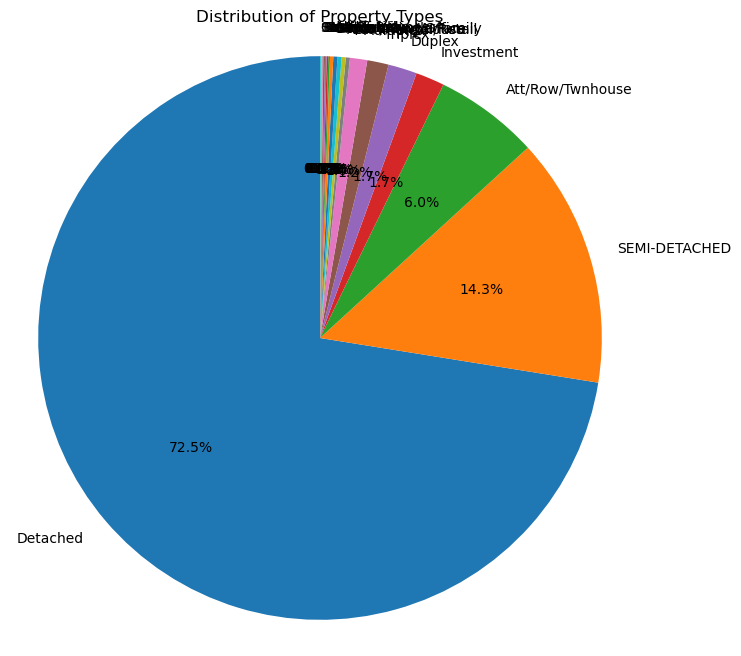

In [121]:
# Calculate statistics by property type based on the frequency

# Calculate property type frequencies
property_freq = df['Type'].value_counts()

# Calculate statistics by property type
property_stats = df.groupby('Type')['Price'].agg(['count', 'mean', 'std', 'min', 'max']).loc[property_freq.index]

print(property_stats)

# Count the occurrences of each property type
property_counts = df['Type'].value_counts()


# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Property Types')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
### Other intersting analysis

In [ ]:
#BEST PLOTS TO SHOW RELATION, CORRELATE MORE VARIABLE IN ONE CHART ETC 

In [ ]:
#To be Continued....